In [72]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.style.use('default')
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, PCA
from sklearn.cluster import KMeans
from sklearn.manifold import Isomap
import requests
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stopwords = set(stopwords_list.decode().splitlines()) 



(300, 2)


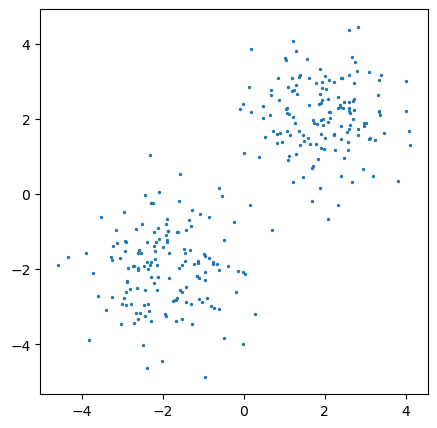

In [2]:
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=300, n_features=2, centers=[[-2,-2],[2,2]])
print (x.shape)
plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], s=2)
#plt.savefig('clusters.png')
plt.show()

In [3]:
kmeans = KMeans(n_clusters=2)
x_ = kmeans.fit_transform(x)
means_ = kmeans.cluster_centers_
print(means_)


[[-1.92703367 -1.96683503]
 [ 1.95971804  2.08336013]]


In [4]:
labels_ = kmeans.labels_
print(labels_)

[1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0
 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1
 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0
 1 0 1 1]


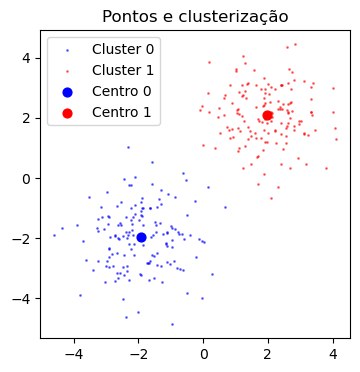

In [5]:
xp = np.array([x[i,:] for i in range(len(labels_)) if labels_[i]==0])
xn = np.array([x[i,:] for i in range(len(labels_)) if labels_[i]==1])
plt.figure(figsize=(4,4))
plt.scatter(xp[:,0], xp[:,1], s=1, c='b', alpha=0.5, label='Cluster 0')
plt.scatter(xn[:,0], xn[:,1], s=1, c='r', alpha=0.5, label='Cluster 1')
plt.scatter(means_[0,0], means_[0,1], s=40, c='b', label='Centro 0')
plt.scatter(means_[1,0], means_[1,1], s=40, c='r', label='Centro 1')
plt.title('Pontos e clusterização')
plt.legend()
plt.show()

# Aplicação: IMDB Dataset

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
No handles with labels found to put in legend.


(2000, 1000)


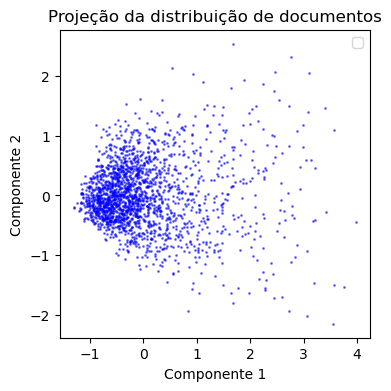

In [75]:
df = pd.read_csv('./datasets/IMDB Dataset.csv').sample(2000)
adhoc_stopwords = set(("good time 10 lost great bad".split()))
vectorizer = CountVectorizer(binary=True, stop_words=set.union(stopwords, adhoc_stopwords), max_features=1000, max_df=0.4, ngram_range=(1,2))
X = vectorizer.fit_transform(list(df['review']))
print(X.shape)
projecao = PCA(n_components=2)
y = projecao.fit_transform(X.toarray())
plt.figure(figsize=(4,4))
plt.scatter(y[:,0], y[:,1], s=1, c='b', alpha=0.5)
plt.title('Projeção da distribuição de documentos')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.legend()
plt.show()

(5, 2)
(404, 2)
(233, 2)
(942, 2)
(415, 2)
(1, 2)


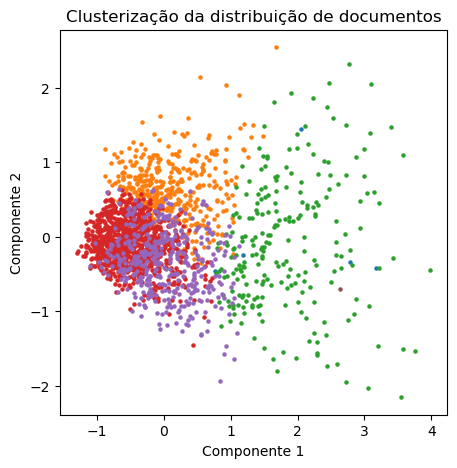

In [76]:
n_clusters = 6
colors = list(mcolors.TABLEAU_COLORS)
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
c = kmeans.labels_
plt.figure(figsize=(5,5))
for k in range(n_clusters):
    yc = np.array([ [y[i,0], y[i,1]] for i in range(len(c)) if c[i]==k ])
    print(yc.shape)
    plt.scatter(yc[:,0], yc[:,1], s=5, c=colors[k], label=str(k))
plt.title('Clusterização da distribuição de documentos')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.show()


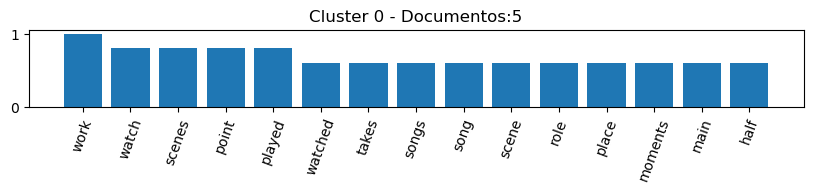

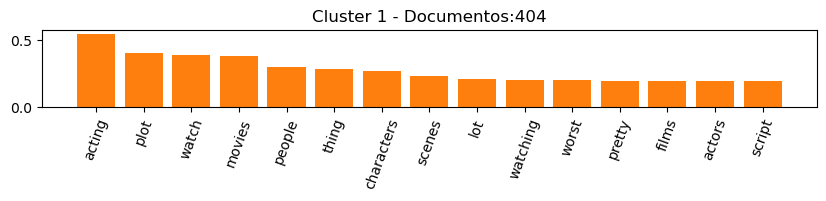

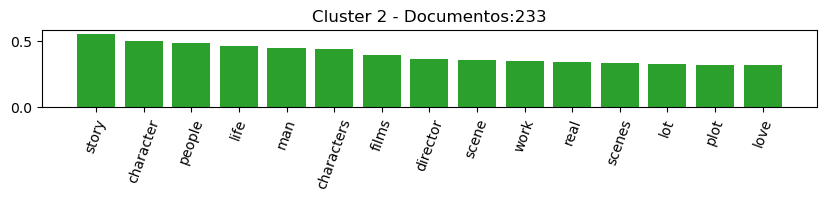

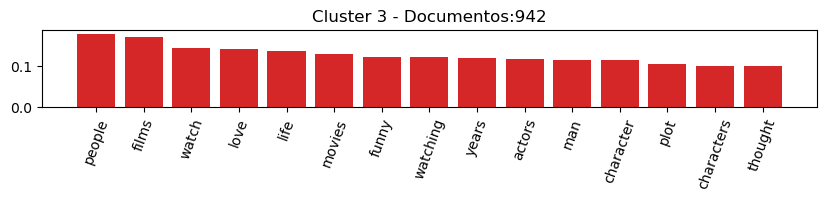

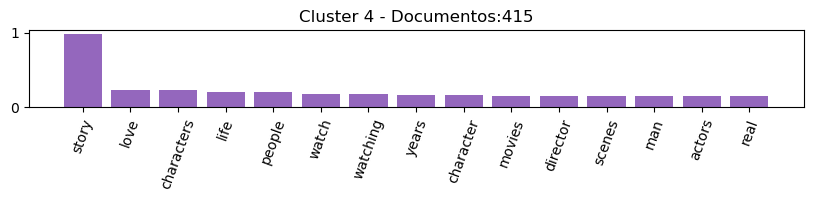

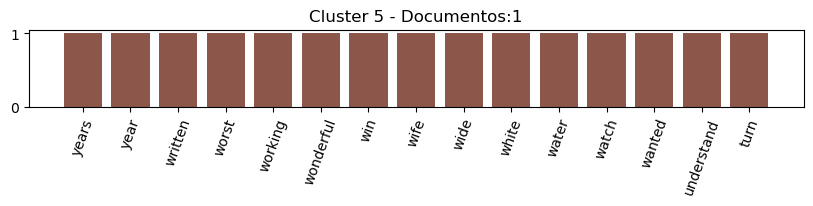

In [78]:

for k in range(n_clusters):
    x_ = np.mean(X[c==k,:], axis=0)

    tuplas = [ (x_[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys()]
    tuplas_ordenadas = sorted(tuplas, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
    palavras = [ t[1] for t in tuplas_ordenadas ]
    contagens = [ t[0] for t in tuplas_ordenadas ]

    n_palavras = 15
    eixo_x = np.arange(n_palavras)
    plt.figure(figsize=(10,1))
    plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras], color=colors[k])
    plt.title('Cluster ' + str(k) + ' - Documentos:' + str(X[c==k,:].shape[0]))
    plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=70)
    plt.show()

# Aplicação: clusterizando clientes

In [80]:
df = pd.read_csv('./datasets/amazon_reviews.csv').sample(2000)
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
4537,AVpjEN4jLJeJML43rpUe,2016-06-08T03:50:06Z,2017-10-21T21:11:53Z,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,https://i.ebayimg.com/thumbs/images/g/crIAAOSw...,"841667103143,0841667103143,brandnewamazonkindl...",...,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025500/review...,This tablet is a good choice for little kids. ...,Great for Kids,gamerbot,http://www.ebay.com/itm/BRAND-NEW-Amazon-Kindl...
1127,AWMjT0WguC1rwyj_rFh3,2018-05-02T14:01:51Z,2018-09-21T19:44:16Z,Amazon - Echo Plus w/ Built-In Hub - Silver,B06XB29FPF,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",https://pisces.bbystatic.com/image2/BestBuy_US...,amazonamazonechoplussmartspeakerwithalexaphili...,...,2018-04-26T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/6036024/revie...,We have two echo ourselves and purchased this ...,Great Gift Idea,Karen,https://www.newegg.com/Product/Product.aspx%25...
3031,AVpfpK8KLJeJML43BCuD,2017-01-04T03:51:17Z,2018-09-21T18:45:08Z,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,B01BH83OOM,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,"amazonecho/b01bh83oom,amazon/b01bh83oom,amazon...",...,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5097300/review...,purchased this as a christmas gift for our son...,amazon tap,chloe,http://reviews.bestbuy.com/3545/5097300/review...
3271,AVpidLjVilAPnD_xEVpI,2016-08-01T02:44:31Z,2018-09-21T18:44:32Z,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",B0189XYY0Q,Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",https://images-na.ssl-images-amazon.com/images...,"amazon/51441641,amazon/53004648,0841667101743,...",...,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,NaN,0,4,http://reviews.bestbuy.com/3545/5386601/review...,I have been a kindle owner since they first ca...,What I Need,Lot49,http://redsky.target.com/v1/plp/search?kwr=y&c...
2850,AVpgdkC8ilAPnD_xsvyi,2016-04-10T22:00:34Z,2018-09-21T18:45:21Z,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",B018Y22BI4,Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,http://i.ebayimg.com/thumbs/images/g/3MIAAOSwo...,amazonfire16gb5thgen2015releaseblack/272201222...,...,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,NaN,0,4,http://reviews.bestbuy.com/3545/5023200/review...,I've purchased 5 of these for my kids the last...,Good tablet.,SamTheCustomer,http://reviews.bestbuy.com/3545/5023200/review...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
No handles with labels found to put in legend.


(1992, 1000)


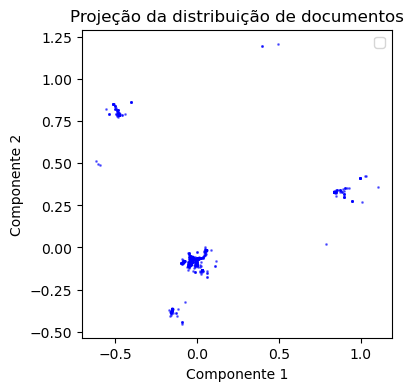

In [95]:
adhoc_stopwords = set(("good time 10 lost great bad amazon echo alexa love tablet".split()))
vectorizer = CountVectorizer(binary=True, stop_words=set.union(stopwords, adhoc_stopwords), max_features=1000, max_df=0.4, ngram_range=(1,2))
X = vectorizer.fit_transform(list(df['reviews.title'].dropna()))
print(X.shape)
projecao = PCA(n_components=2)
y = projecao.fit_transform(X.toarray())
plt.figure(figsize=(4,4))
plt.scatter(y[:,0], y[:,1], s=1, c='b', alpha=0.5)
plt.title('Projeção da distribuição de documentos')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.legend()
plt.show()

(63, 2)
(135, 2)
(1540, 2)
(2, 2)
(2, 2)
(75, 2)
(41, 2)
(132, 2)
(2, 2)


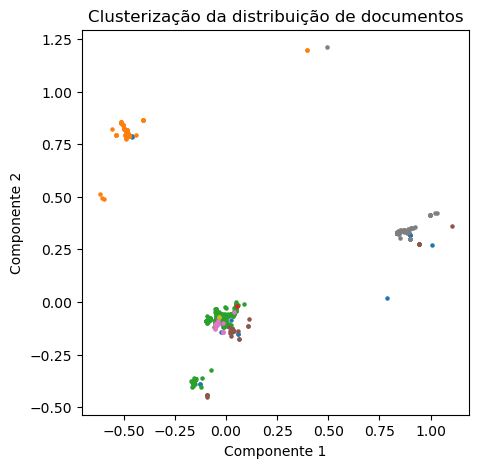

In [96]:
n_clusters = 9
colors = list(mcolors.TABLEAU_COLORS)
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
c = kmeans.labels_
plt.figure(figsize=(5,5))
for k in range(n_clusters):
    yc = np.array([ [y[i,0], y[i,1]] for i in range(len(c)) if c[i]==k ])
    print(yc.shape)
    plt.scatter(yc[:,0], yc[:,1], s=5, c=colors[k], label=str(k))
plt.title('Clusterização da distribuição de documentos')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.show()


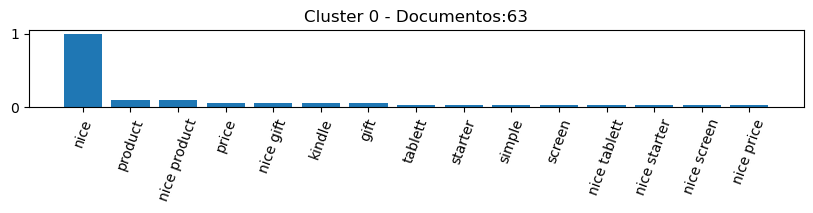

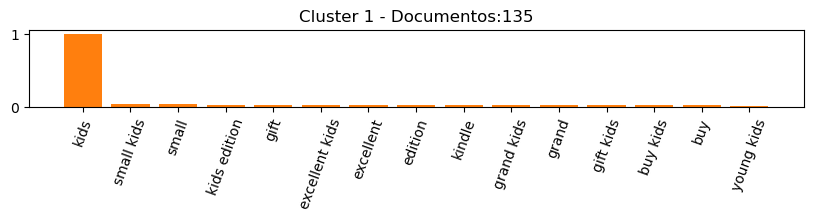

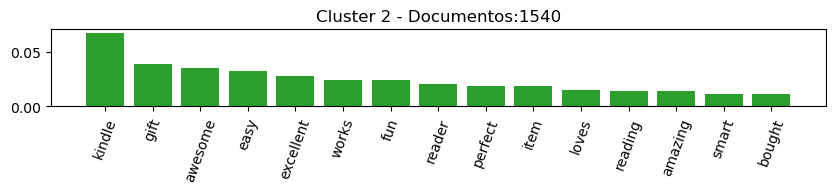

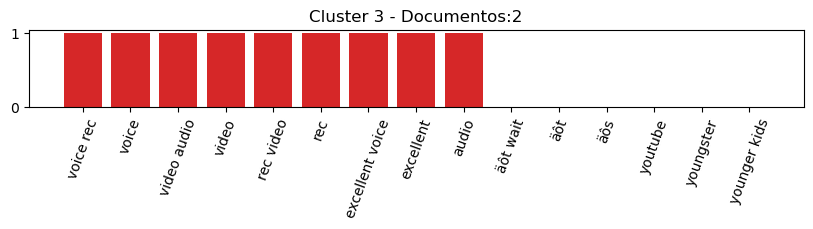

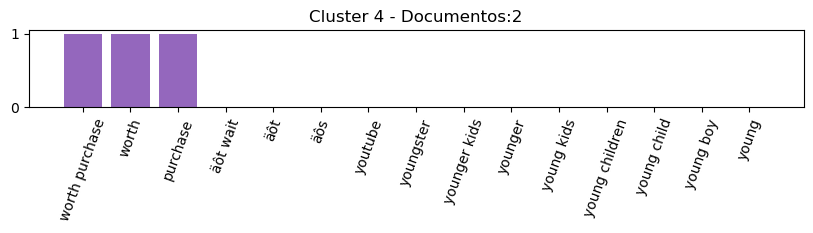

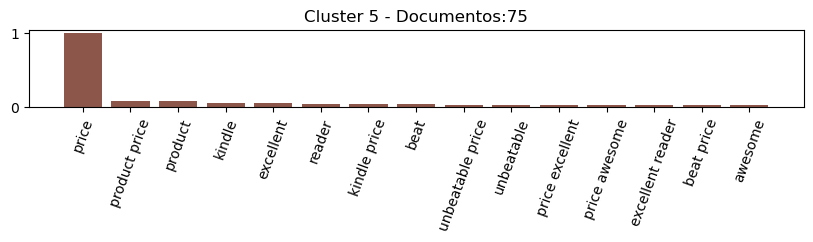

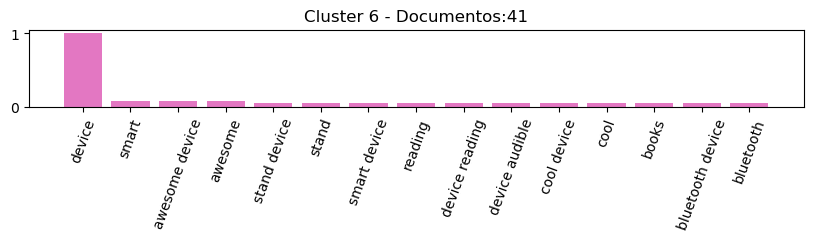

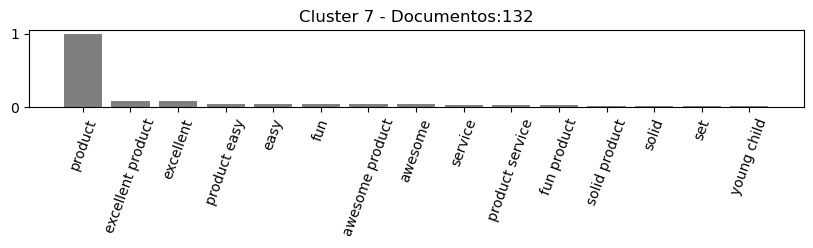

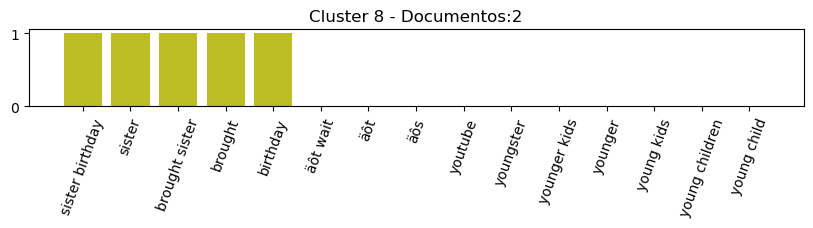

In [97]:

for k in range(n_clusters):
    x_ = np.mean(X[c==k,:], axis=0)

    tuplas = [ (x_[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys()]
    tuplas_ordenadas = sorted(tuplas, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
    palavras = [ t[1] for t in tuplas_ordenadas ]
    contagens = [ t[0] for t in tuplas_ordenadas ]

    n_palavras = 15
    eixo_x = np.arange(n_palavras)
    plt.figure(figsize=(10,1))
    plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras], color=colors[k])
    plt.title('Cluster ' + str(k) + ' - Documentos:' + str(X[c==k,:].shape[0]))
    plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=70)
    plt.show()